## Handwritten letters

### Importaciones Necesarias para la ejecucion

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import random
import glob

### Leer los datos del Dataset

Tomaremos datos al azar y limitaremos el numero de datos a 65,000 para que no haya perdida de rendimiento.

In [23]:
n = 372450 # número de datos
s = 62576 # número de datos deseados
skip = sorted(random.sample(range(n),n-s))
data = pd.read_csv(r"./data/A_Z Handwritten Data.csv", skiprows=skip).astype('float32')
print(data.head(10))

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.614  0.615  0.616  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.617  0.618  0.619  0.620  0.621  0.622  0.623  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

### Dividiremos los datos en imagenes y sus respectivos labels

In [24]:
X = data.drop('0',axis = 1)
y = data['0']

### Reshape de los datos

In [25]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (50060, 28, 28)
Test data shape:  (12516, 28, 28)


In [26]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

### Graficamos los caracteres y sus número de elementos

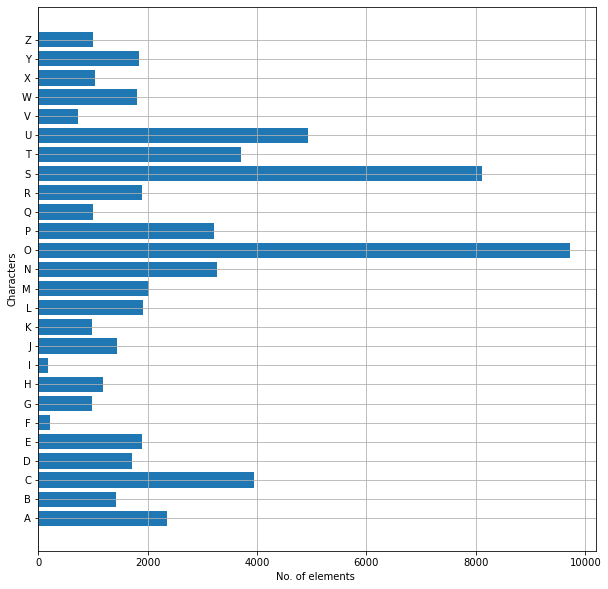

In [27]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in word_dict.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("No. of elements ")
plt.ylabel("Characters")
plt.grid()
plt.show()

### Shuffling de los datos

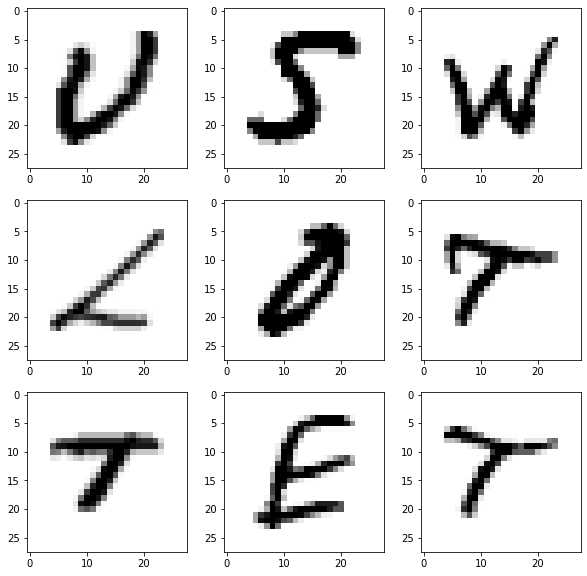

In [28]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

### Reshaping de datos

In [29]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (50060, 28, 28, 1)
New shape of train data:  (12516, 28, 28, 1)


In [30]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (50060, 26)
New shape of test labels:  (12516, 26)


### Modelo CNN

In [31]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

### Compilación del modelo y fit

In [32]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=2,  validation_data = (test_X,test_yOHE))

Train on 50060 samples, validate on 12516 samples
Epoch 1/2
50060/50060 [==============================] - 225s 4ms/step - loss: 0.4234 - accuracy: 0.8913 - val_loss: 0.1249 - val_accuracy: 0.9633
Epoch 2/2
50060/50060 [==============================] - 211s 4ms/step - loss: 0.1280 - accuracy: 0.9625 - val_loss: 0.1329 - val_accuracy: 0.9611


In [33]:
model.summary()
model.save(r'model_hand.h5')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

In [34]:
print("The validation accuracy is :", history.history['val_accuracy'][1])
print("The training accuracy is :", history.history['accuracy'][1])
print("The validation loss is :", history.history['val_loss'][1])
print("The training loss is :", history.history['loss'][1])

The validation accuracy is : 0.9610897898674011
The training accuracy is : 0.962485
The validation loss is : 0.13287664483311135
The training loss is : 0.1279660926550579


### Test de predicción de las muestras

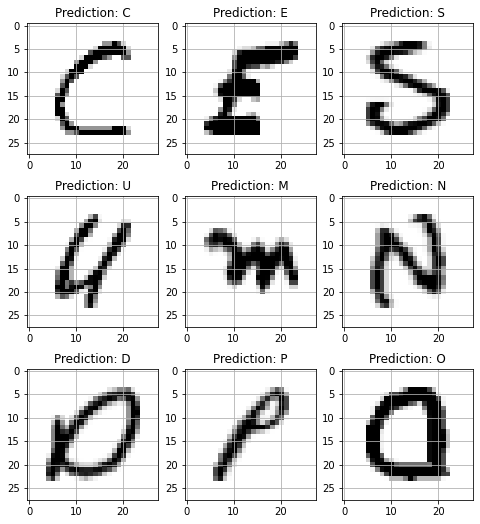

In [35]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

###  Haciendo la predicción con muestras ajenas al dataset

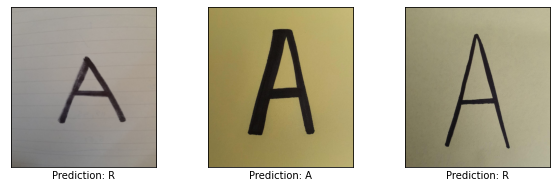

In [48]:
images = []
pred = []

for img_path in glob.glob('./test/*.jpeg'):
  img = cv2.imread(img_path)
  
  img_copy = img.copy()
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (400,440))

  img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
  img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
  _, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
  img_final = cv2.resize(img_thresh, (28,28))
  img_final =np.reshape(img_final, (1,28,28,1))

  img_pred = word_dict[np.argmax(model.predict(img_final))]
  ## cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
  cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)

  images.append(img)
  pred.append("Prediction: " + img_pred)

plt.figure(figsize=(10,10))
for i in range(len(images)):
  plt.subplot(3, 3, i+1)
  plt.imshow(images[i])
  plt.xlabel(pred[i])
  plt.xticks([])
  plt.yticks([])